In [16]:
## RUN THIS CELL TO INTIATE LIBRIARES AND FUNCTIONS##

#Importing data into seperate arrays
import numpy as np
import scipy
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import re
from ctypes import c_int32
from matplotlib.colors import CSS4_COLORS
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import array as ar
from mpl_toolkits.mplot3d import Axes3D as ax
import cmath
from scipy import optimize
from matplotlib.animation import FuncAnimation
import math
from sklearn.metrics import r2_score
import matplotlib.gridspec as gridspec


#Wave function Second derivite W.R.T. X (aka x accel)
#S is the sensor to inspect
#p and v are the dampening coefficient and speed of water waves respectively
#t is the check array
#i is the index of which row of data we are using
def S_X_Prd(S,p,v,t,N,i):
  result = 0
  m = 1
  n = 1
  while(n<N+1):
    while(m<N+1):
      term1 = -(((n**2)*np.pi**2)/(lx**2))*np.sin((n*np.pi*S[0]) / lx)
      term2 = np.sin((m*np.pi*S[1]) / ly)
      term3 = np.exp((-p*t) / 2)
      term5 = np.sin((m*np.pi*(S5[1]))/ly) * np.sin((n*np.pi*(S5[0])) / lx) #Sensor 5
      term11 = np.sin((m*np.pi*(S1[1]))/ly) * np.sin((n*np.pi*(S1[0])) / lx) #Sensor 1
      term7 = np.sin((m*np.pi*(S7[1]))/ly) * np.sin((n*np.pi*(S7[0])) / lx) #Sensor 7
      term4 = np.sin((m*np.pi*(S4[1]))/ly) * np.sin((n*np.pi*(S4[0])) / lx) #Sensor 4
      l = ((v)**2)*(np.pi**2)*((n**2)/(lx**2)+(m**2)/(ly**2))
      if (4*l > ((p)**2)):
        w = (np.sqrt((4*l - (p**2))))/2
        if abs(w) != 0:
          if (i - math.floor((np.pi/(4*w))/.06)) < (len(S[3])-1):
            C = ((4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
            E = np.exp(-(p*np.pi)/(4*w))
            D = -(((S7[3][i - math.ceil((np.pi/(2*w))/.06)])*(term7) - (S4[3][i - math.ceil((np.pi/(2*w))/.06)])*(term4) + (S5[4][i - math.ceil((np.pi/(2*w))/.06)])*(term5) - (S1[4][i - math.ceil((np.pi/(2*w))/.06)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
            A = (-1/((((p**2)-4*w**2)*C-4*D*p*w)*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
            result += -A*(term1 * term2 * term3 * (C * np.cos( w * t) + D * np.sin (w * t)))
            m += 1
          else:
            m += 1
        else:
          m += 1
      else:
        w = (np.sqrt(((p**2)- 4*l)))/2
        if abs(w) != 0:
          if (i - math.floor((np.pi/(2*w))/.06)) < (len(S[3])-1):
            C = ((4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
            E = np.exp(-(p*np.pi)/(4*w))
            D = (((S7[3][i - math.floor((np.pi/(2*w))/.06)])*(term7) - (S4[3][i - math.floor((np.pi/(2*w))/.06)])*(term4) + (S5[4][i - math.floor((np.pi/(2*w))/.06)])*(term5) - (S1[4][i - math.floor((np.pi/(2*w))/.06)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
            A = (-1/(((((p**2))+4*w**2)*C-D*p*w)*4*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
            result += -A*(term1 * term2 * term3 * (C * np.cosh( w * t) - D * np.sinh(w * t)))
            m += 1
          else:
            m += 1
        else:
          m +=1
    n += 1
  cuthigh = (S1[10] + S5[10] + S4[10] + S7[10])/4 + (S1[12] + S4[12] + S5[12] + S7[12])/2
  cutlow = (S1[11] + S5[11] + S4[11] + S7[11])/4 - (S1[12] + S4[12] + S5[12] + S7[12])/2
  if result > cuthigh:
    result = cuthigh
  if result < cutlow:
    result = cutlow
  return result

#Wave equation Y accel
def S_Y_Prd(S,p,v,t,N,i):
  result = 0
  m = 1
  n = 1
  while(n<N+1):
    while(m<N+1):
      term1 = np.sin((n*np.pi*S[0]) / lx)
      term2 = -(((m**2)*np.pi**2)/(ly**2))*np.sin((m*np.pi*S[1]) / ly)
      term3 = np.exp((-p*t) / 2)
      term5 = np.sin((m*np.pi*(S5[1]))/ly) * np.sin((n*np.pi*(S5[0])) / lx) #Sensor 5
      term11 = np.sin((m*np.pi*(S1[1]))/ly) * np.sin((n*np.pi*(S1[0])) / lx) #Sensor 1
      term7 = np.sin((m*np.pi*(S7[1]))/ly) * np.sin((n*np.pi*(S7[0])) / lx) #Sensor 7
      term4 = np.sin((m*np.pi*(S4[1]))/ly) * np.sin((n*np.pi*(S4[0])) / lx) #Sensor 4
      l = ((v)**2)*(np.pi**2)*((n**2)/(lx**2)+(m**2)/(ly**2))
      if (4*l > ((p)**2)):
        w = (np.sqrt((4*l - (p**2))))/2
        if abs(w) != 0:
          if (i - math.floor((np.pi/(2*w))/.06)) < (len(S[3])-1):
            C = ((4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
            E = np.exp(-(p*np.pi)/(4*w))
            D = -(((S7[3][i - math.ceil((np.pi/(2*w))/.06)])*(term7) - (S4[3][i - math.ceil((np.pi/(2*w))/.06)])*(term4) + (S5[4][i - math.floor((np.pi/(2*w))/.06)])*(term5) - (S1[4][i - math.floor((np.pi/(2*w))/.06)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
            A = -(1/(((((p**2))-4*w**2)*C-4*D*p*w)*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
            result += -A*(term1 * term2 * term3 * (C * np.cos( w * t) + D * np.sin (w * t)))
            m += 1
          else:
            m += 1
        else:
          m += 1
      else:
        w = (np.sqrt(((p**2)- 4*l)))/2
        if abs(w) != 0:
          if (i - math.floor((np.pi/(2*w))/.06)) < (len(S[3])-1):
            C = ((4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
            E = np.exp(-(p*np.pi)/(4*w))
            D = -(((S7[3][i - math.floor((np.pi/(2*w))/.06)])*(term7) - (S4[3][i - math.floor((np.pi/(2*w))/.06)])*(term4) + (S5[4][i - math.floor((np.pi/(2*w))/.06)])*(term5) - (S1[4][i - math.floor((np.pi/(2*w))/.06)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
            A = -(1/(((((p**2)/4)+w**2)*C-D*p*w)*4*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
            result += -A*(term1 * term2 * term3 * (C * np.cosh( w * t) - D * np.sinh(w * t)))
            m += 1
          else:
            m += 1
        else:
          m +=1
    n += 1
  cuthigh = (S1[13] + S5[13] + S4[13] + S7[13])/4 + (S1[15] + S4[15] + S5[15] + S7[15])/2
  cutlow = (S1[14] + S5[14] + S4[14] + S7[14])/4 - (S1[15] + S4[15] + S5[15] + S7[15])/2
  if result > cuthigh:
    result = cuthigh
  if result < cutlow:
    result = cutlow
  return result


#Error Function of our model that we need to minimize (X data)
#N is how many times it sums (Summation of n,m=1 to n,m = N)
#h is the cutoff value since some p and v will yield bad error (Makes heat maps more readable)
def opt_x(S,num,p,v,N,h):
  tot = []
  i = S[8][0] + 5
  m = S[8][1] - 15

  if num == 1:
    for j in range(i,m):
      tot.append((((S[3][j] - S_X_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 4:
    for j in range(i,m):
      tot.append((((S[4][j] - S_X_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h

  if num == 5:
    for j in range(i,m):
      tot.append((((-S[3][j] - S_X_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 7:
    for j in range(i,m):
      tot.append((((-S[4][j] - S_X_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 6:
    for j in range(i,m):
      tot.append((((-S[3][j] - S_X_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h


#Y data version
def opt_y(S,num,p,v,N,h):
  tot = []
  i = S[9][0] + 5
  m = S[9][1] - 15

  if num == 1:
    for j in range(i,m):
      tot.append((((-S[4][j] - S_Y_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 4:
    for j in range(i,m):
      tot.append((((-S[3][j] - S_Y_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h

  if num == 5:
    for j in range(i,m):
      tot.append((((S[4][j] - S_Y_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 7:
    for j in range(i,m):
      tot.append((((S[3][j] - S_Y_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h
  
  if num == 6:
    for j in range(i,m):
      tot.append((((S[4][j] - S_Y_Prd(S,p,v,check[j],N,j))**2)))
    g = np.sum(tot)
    if abs(g) < h:
      h = g
    return h

#Get an the interval inwhich the pertubation is contained
#If you want X int k = 3, if you want Y int k =4
def get_int(S,k,n,m):
  ary = []
  g = np.max(np.abs(S[k][n:m]))
  for i in range(n,m):
    q = np.abs(S[k][i])
    if g == q:
      ary.append(i-10)
      ary.append(i+30)
  return ary

#Recenter the data to 0
def stndz(x,i):
  ar = []
  avg = np.average(x[:i])
  j = 0
  while j < (len(x)):
    ar.append(x[j] - avg)
    j += 1
  return ar

#Newtonian Method for minimizing, initial guess for p and v are needed
#S is sensor you are inspecting
#P,V are the intial guess for p and v respectively
#N is what it sums to (keep around 12-20)
def MINI_x(S,P,V,N):
  tot = []
  totty = []
  x0 = []
  y0 = []
  z0 = []
  tet = 100
  vest = V
  pest = P
  dif = .01
  g = 10
  for i in range(300):
    Pdir1 = (opt_y(S,pest + dif, vest, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    if Pdir1 == 0:
      pest += .01
      Pdir1 = (opt_y(S,pest + dif, vest, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    Pdir2 = (opt_y(S,pest + 2*dif, vest, N,50) - 2*opt_y(S,pest + dif, vest, N,50) + opt_y(S,pest,vest, N,50))/(dif**2)
    Vdir1 = (opt_y(S,pest, vest + dif, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    if Vdir1 == 0:
      vest += .01
      Vdir1 = (opt_y(S,pest, vest + dif, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    Vdir2 = (opt_x(S,pest, vest + 2*dif, N,50) - 2*opt_x(S,pest, vest + dif, N,50) + opt_x(S,pest,vest, N,50))/(dif**2)
    g = np.sqrt(opt_x(S,pest,vest,N,50))
    if Pdir2 != 0:
      if Vdir2 !=0:
        if np.abs(g) < tet:
          x0.append(vest)
          y0.append(pest)
          z0.append(np.abs(g))
          tet = g
          pest = pest - Pdir1/Pdir2
          vest = vest - Vdir1/Vdir2
        else:
          pest = pest - Pdir1/Pdir2
          vest = vest - Vdir1/Vdir2
      else:
        if Vdir2 !=0:
          if np.abs(g) < tet:
            x0.append(vest)
            y0.append(pest)
            z0.append(np.abs(g))
            tet = g
            vest = vest - Vdir1/Vdir2
          else:
            vest = vest - Vdir1/Vdir2
  tot.append(y0)
  tot.append(x0)
  tot.append(z0)
  return tot

#Y version
def MINI_y(S,N,P,V):
  tot = []
  totty = []
  x0 = []
  y0 = []
  z0 = []
  tet = 100
  vest = V
  pest = P
  dif = .01
  g = 10
  for i in range(300):
    Pdir1 = (opt_y(S,pest + dif, vest, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    if Pdir1 == 0:
      pest += .01
      Pdir1 = (opt_y(S,pest + dif, vest, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    Pdir2 = (opt_y(S,pest + 2*dif, vest, N,50) - 2*opt_y(S,pest + dif, vest, N,50) + opt_y(S,pest,vest, N,50))/(dif**2)
    Vdir1 = (opt_y(S,pest, vest + dif, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    if Vdir1 == 0:
      vest += .01
      Vdir1 = (opt_y(S,pest, vest + dif, N,50) - opt_y(S,pest,vest,N,50))/(dif)
    Vdir2 = (opt_y(S,pest, vest + 2*dif, N,50) - 2*opt_y(S,pest, vest + dif, N,50) + opt_y(S,pest,vest, N,50))/(dif**2)
    g = np.sqrt(opt_y(S,pest,vest,N,50))
    if Pdir2 != 0:
      if Vdir2 !=0:
        if np.abs(g) < tet:
          x0.append(vest)
          y0.append(pest)
          z0.append(np.abs(g))
          tet = g
          pest = pest - Pdir1/Pdir2
          vest = vest - Vdir1/Vdir2
        else:
          pest = pest - Pdir1/Pdir2
          vest = vest - Vdir1/Vdir2
    i += 1
  tot.append(y0)
  tot.append(x0)
  tot.append(z0)
  return tot

#S is the sensor you want to inspect
#num is just sensor number and is only used for making the titling easier
#l_p/h_p is lower and upper bound for p, same for v
#l is how many values to search
#KEEP l BELOW 100, 100 takes about 5-6 minutes
#h is the cut off value (some p and v combos will yield huge error so cap it off at a reasonable value)
def heat_map_x(S,num,l_p,h_p,l_v,h_v,h,l):
  p = np.linspace(l_p, h_p, l)
  v = np.linspace(l_v, h_v, l)
  zz = np.zeros([len(p), len(v)])
  for i in range(len(p)):
    for j in range(len(v)):
      zz[i, j] = opt_x(S,num,p[i],v[j],12,h)
  fig, ax = plt.subplots()
  ax.clear()
  p3 = ax.pcolor(p, v, zz, cmap= 'turbo', vmin=abs(zz).min(), vmax=abs(zz).max())
  cb = fig.colorbar(p3, ax=ax)
  title = "Test " + Test_num + " Sensor " + str(num) + ": X-accel Prediction Map"
  ax.set_title(title)
  ax.set_xlim(l_p,h_p)
  ax.set_ylim(l_v,h_v)
  ax.set_xlabel("p (1/s)")
  ax.set_ylabel("v (m/s)")
  cb.set_label("Total Error")
  plt.show()
  saveh = "Heat_map_x_" + str(num) + "_test_" + Test_num + ".jpg"
  fig.savefig(saveh)
  return p3

#Heat map for y accel
def heat_map_y(S,num,lp,hp,lv,hv,h,l):
  p = np.linspace(lp, hp, l)
  v = np.linspace(lv, hv, l)
  zz = np.zeros([len(p), len(v)])
  for i in range(len(p)):
      for j in range(len(v)):
          zz[i, j] = opt_y(S,num,p[i],v[j],12,h)
  fig, ax = plt.subplots()
  p3 = ax.pcolor(p, v, zz, cmap= 'turbo', vmin=abs(zz).min(), vmax=abs(zz).max())
  cb = fig.colorbar(p3, ax=ax)
  title = "Test " + Test_num + " Sensor " + str(num) + ": Y-accel Prediction Map"
  ax.set_title(title)
  ax.set_xlabel("P values")
  ax.set_ylabel("V values")
  cb.set_label("Total Error")
  plt.show()
  saveh = "Heat_map_y_" + str(num) + "_test_" + Test_num + ".jpg"
  fig.savefig(saveh)
  return p3


import pandas as pd
##This is what gets the csv file arranged
#S is the sensor you want to inspect
#num is just sensor number and is only used for making the titling easier
#l_p/h_p is lower and upper bound for p, same for v
#l is how many values to search
#KEEP l BELOW 100, 100 takes about 5-6 minutes
#h is the cut off value (some p and v combos will yield huge error so cap it off at a reasonable value)
def get_CSV_x(S,num,lp,hp,lv,hv,l):
  p = np.linspace(lp,hp,l)
  v = np.linspace(lv,hv,l)
  wh = []
  par = []
  var = []
  zar = []
  for kk in range(len(p)):
    for jj in range(len(v)):
      z = opt_x(S,num,p[kk],v[jj],12,100) #this is the opt function within the get_csv function
      par.append(p[kk])               #I was mentioning, increase the 100 if the error is THAT bad
      var.append(v[jj])
      zar.append(z)
  wh.append(par)
  wh.append(var)
  wh.append(zar)
  return wh

def get_CSV_y(S,num,lp,hp,lv,hv,l):
  p = np.linspace(lp,hp,l)
  v = np.linspace(lv,hv,l)
  wh = []
  par = []
  var = []
  zar = []
  for kk in range(len(p)):
    for jj in range(len(v)):
      z = opt_y(S,num,p[kk],v[jj],12,100)
      par.append(p[kk])
      var.append(v[jj])
      zar.append(z)
  wh.append(par)
  wh.append(var)
  wh.append(zar)
  return wh

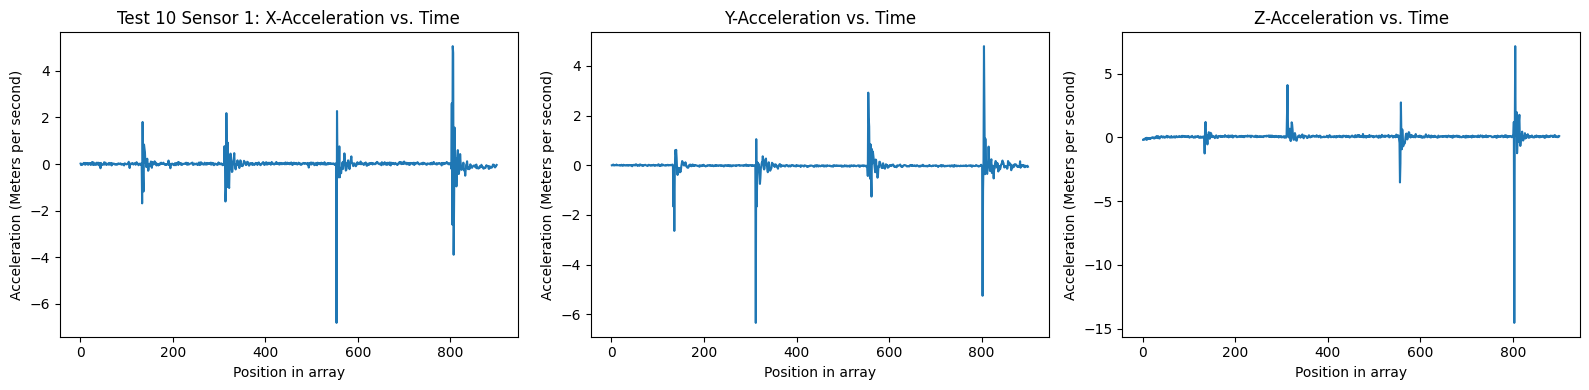

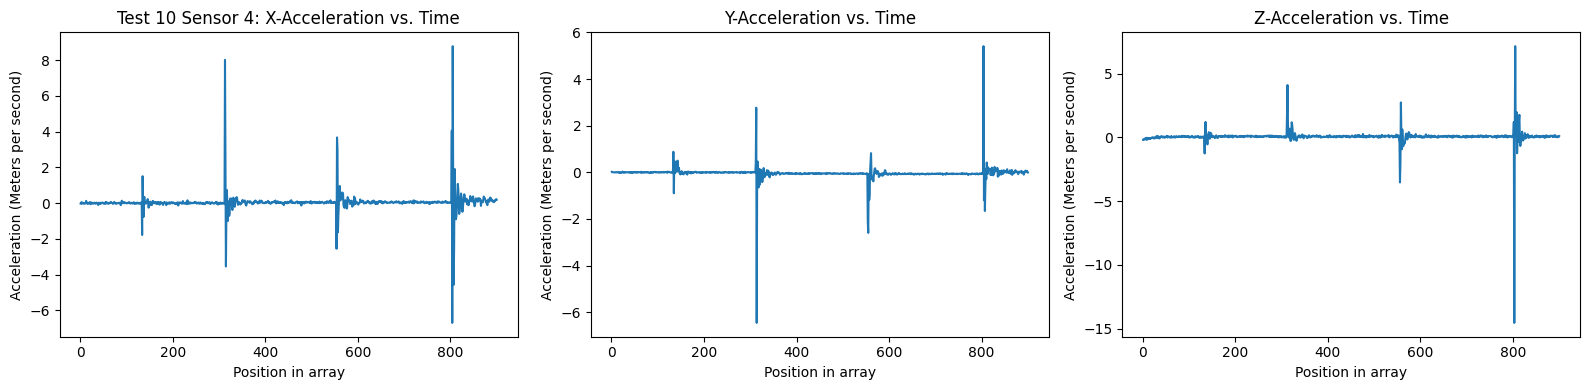

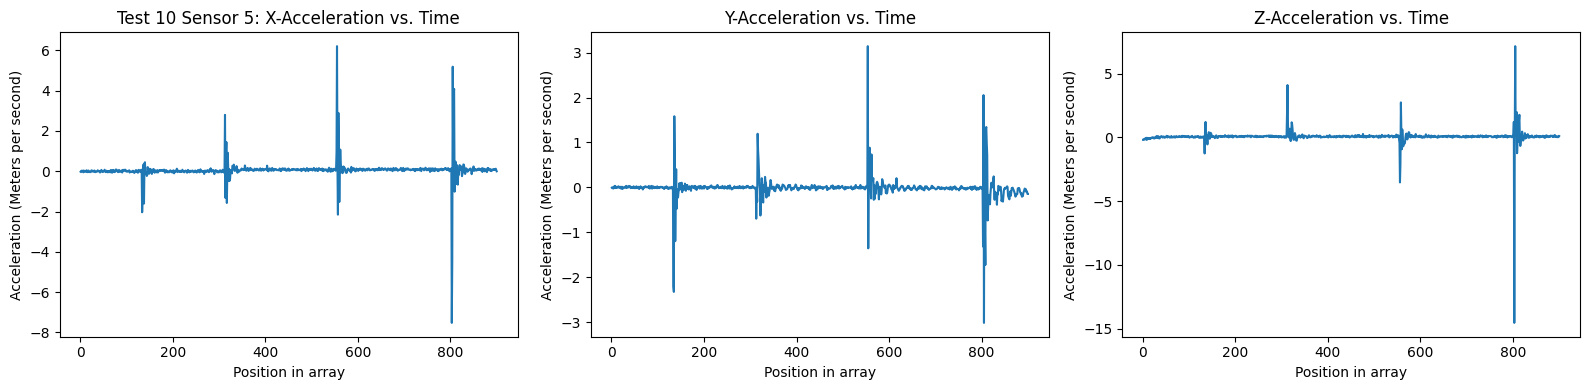

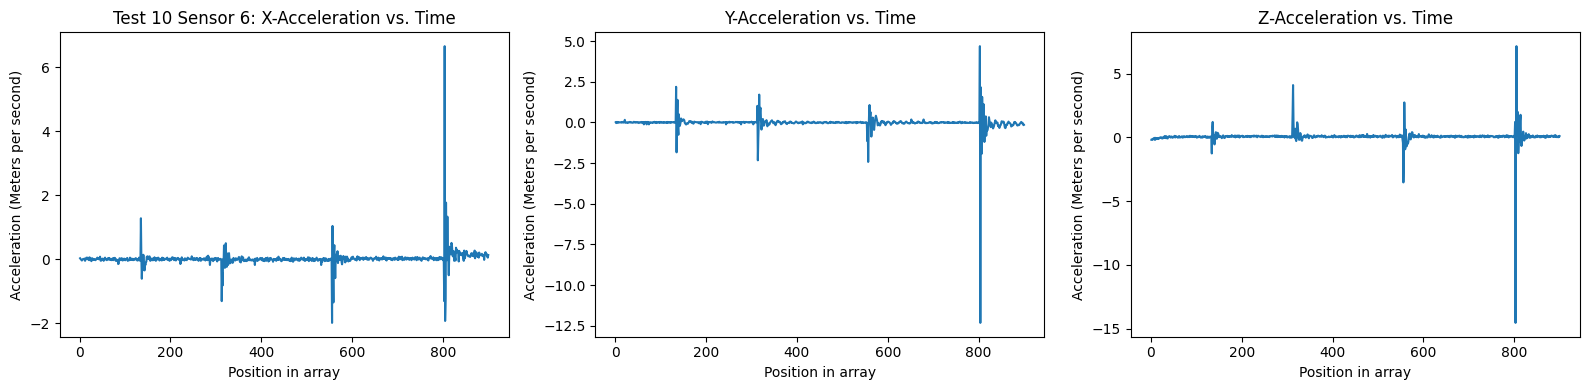

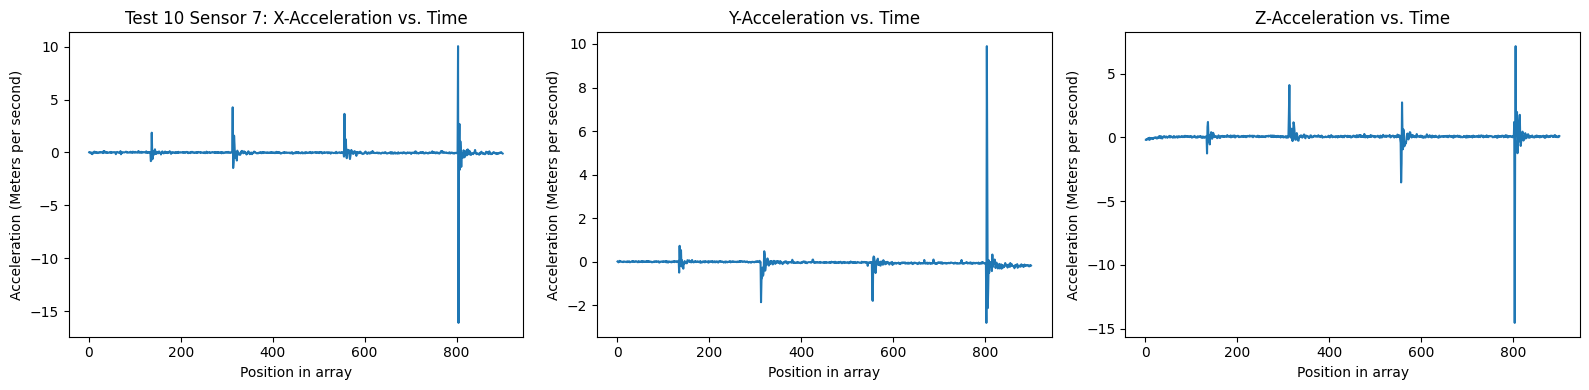

In [2]:
##LOOK OVER DATA##


#ENTER IN THE TEST NUMBER HERE FOR EASE OF NAMING THE GRAPHS
Test_num = str(10) #Just change number in str

#Import Data
#Change file name to whatever test your are performing (should be able to just change the number after test)
df = pd.read_csv('/content/Test 10.CSV') #you will need to upload the CSV files into the colab books files
data = np.array(df)                     #the file does not save so you will have to upload it every time you close out
x7 = []                                 #or refresh the page
x6 = []
x5 = []
x4 = []
x1 = []
y7 = []
y6 = []
y5 = []
y4 = []
y1 = []
z7 = []
z6 = []
z5 = []
z4 = []
z1 = []
t = []
mt = []
i = 0
j = 0
while(i<900):
  x7.append(data[i][j])
  j += 1
  y7.append(data[i][j])
  j += 1
  z7.append(data[i][j])
  j += 1
  x6.append(data[i][j])
  j += 1
  y6.append(data[i][j])
  j += 1
  z6.append(data[i][j])
  j += 1
  x5.append(data[i][j])
  j += 1
  y5.append(data[i][j])
  j += 1
  z5.append(data[i][j])
  j += 1
  x4.append(data[i][j])
  j += 1
  y4.append(data[i][j])
  j += 1
  z4.append(data[i][j])
  j += 1
  x1.append(data[i][j])
  j += 1
  y1.append(data[i][j])
  j += 1
  z1.append(data[i][j])
  j += 1
  t.append(data[i][j])
  j += 1
  mt.append(data[i][j])
  i += 1
  j = 0

ly = .355 #length of box in x direction
lx = .27 #length of box in y direction
h = .1 #height of water

mt_s = [] #millis readings
q = 0
while(len(mt) > q):
  spt = .001*(mt[q] - mt[0])
  mt_s.append(spt)
  q += 1

#Get array of delay between readings
check =[]
vc = 0 
for vc in range(len(mt) - 1):
  gf = mt[vc]
  vc += 1
  ef = mt[vc]
  ad = (ef - gf)*.001
  check.append(ad)

x1ar = stndz(x1,100)
y1ar = stndz(y1,100)
z1ar = stndz(z1,100)
x4ar = stndz(x4,100)
y4ar = stndz(y4,100)
z4ar = stndz(z4,100)
x5ar = stndz(x5,100)
y5ar = stndz(y5,100)
z5ar = stndz(z5,100)
x6ar = stndz(x6,100)
y6ar = stndz(y6,100)
z6ar = stndz(z6,100)
x7ar = stndz(x7,100)
y7ar = stndz(y7,100)
z7ar = stndz(z7,100)

l6y = .195 #Location of sensor 6 in the y direction
l6x = .15 #Location of sensor 6 in the x direction

#Define arrays for each sensor to have location and readings all in one spot
S1 = [lx - .055,l6y,h, x1ar, y1ar, z1ar, mt_s, check]
S4 = [l6x,ly-.06,h, x4ar, y4ar, z4ar, mt_s, check]
S5 = [.055,l6y,h, x5ar, y5ar, z5ar, mt_s, check]
S6 = [l6x,l6y,h, x6ar, y6ar, z6ar, mt_s, check]
S7 = [l6x,.06,h, x7ar, y7ar, z7ar, mt_s, check]

iar = np.linspace(1,900,900)

a1fig = plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,3,1)
ax1 = plt.plot(iar,S1[3])
ax1 = plt.xlabel("Position in array", fontsize = 10)
ax1 = plt.ylabel("Acceleration (Meters per second)", fontsize= 10)
ax1 = plt.title("Test " + Test_num + " Sensor 1: X-Acceleration vs. Time", fontsize = 12)
ax2 = plt.subplot(1,3,2)
ax2 = plt.plot(iar,S1[4])
ax2 = plt.xlabel("Position in array", fontsize= 10)
ax2 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
ax2 = plt.title("Y-Acceleration vs. Time", fontsize =12)
axz1 = plt.subplot(1,3,3)
axz1 = plt.plot(iar,S1[5])
axz1 = plt.xlabel("Position in array", fontsize= 10)
axz1 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
axz1 = plt.title("Z-Acceleration vs. Time", fontsize =12)
a1fig.tight_layout()
a1sv = "Sensor1_acel_data_test_" + Test_num + ".jpg"
a1fig.savefig(a1sv)
a2fig = plt.figure(figsize=(16,4))
ax3 = plt.subplot(1,3,1)
ax3 = plt.plot(iar,S4[3])
ax3 = plt.xlabel("Position in array", fontsize = 10)
ax3 = plt.ylabel("Acceleration (Meters per second)", fontsize= 10)
ax3 = plt.title("Test " + Test_num + " Sensor 4: X-Acceleration vs. Time", fontsize = 12)
ax4 = plt.subplot(1,3,2)
ax4 = plt.plot(iar,S4[4])
ax4 = plt.xlabel("Position in array", fontsize= 10)
ax4 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
ax4 = plt.title("Y-Acceleration vs. Time", fontsize =12)
axz2 = plt.subplot(1,3,3)
axz2 = plt.plot(iar,S1[5])
axz2 = plt.xlabel("Position in array", fontsize= 10)
axz2 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
axz2 = plt.title("Z-Acceleration vs. Time", fontsize =12)
a2fig.tight_layout()
a2sv = "Sensor4_acel_data_test_" + Test_num + ".jpg"
a2fig.savefig(a2sv)
a3fig = plt.figure(figsize=(16,4))
ax5 = plt.subplot(1,3,1)
ax5 = plt.plot(iar,S5[3])
ax5 = plt.xlabel("Position in array", fontsize = 10)
ax5 = plt.ylabel("Acceleration (Meters per second)", fontsize= 10)
ax5 = plt.title("Test " + Test_num + " Sensor 5: X-Acceleration vs. Time", fontsize = 12)
ax6 = plt.subplot(1,3,2)
ax6 = plt.plot(iar,S5[4])
ax6 = plt.xlabel("Position in array", fontsize= 10)
ax6 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
ax6 = plt.title("Y-Acceleration vs. Time", fontsize =12)
axz3 = plt.subplot(1,3,3)
axz3 = plt.plot(iar,S1[5])
axz3 = plt.xlabel("Position in array", fontsize= 10)
axz3 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
axz3 = plt.title("Z-Acceleration vs. Time", fontsize =12)
a3fig.tight_layout()
a3sv = "Sensor5_acel_data_test_" + Test_num + ".jpg"
a3fig.savefig(a3sv)
a4fig = plt.figure(figsize=(16,4))
ax7 = plt.subplot(1,3,1)
ax7 = plt.plot(iar,S6[3])
ax7 = plt.xlabel("Position in array", fontsize = 10)
ax7 = plt.ylabel("Acceleration (Meters per second)", fontsize= 10)
ax7 = plt.title("Test " + Test_num + " Sensor 6: X-Acceleration vs. Time", fontsize = 12)
ax8 = plt.subplot(1,3,2)
ax8 = plt.plot(iar,S6[4])
ax8 = plt.xlabel("Position in array", fontsize= 10)
ax8 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
ax8 = plt.title("Y-Acceleration vs. Time", fontsize =12)
axz5 = plt.subplot(1,3,3)
axz5 = plt.plot(iar,S1[5])
axz5 = plt.xlabel("Position in array", fontsize= 10)
axz5 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
axz5 = plt.title("Z-Acceleration vs. Time", fontsize =12)
a4fig.tight_layout()
a4sv = "Sensor6_acel_data_test_" + Test_num + ".jpg"
a4fig.savefig(a4sv)
a5fig = plt.figure(figsize=(16,4))
ax9 = plt.subplot(1,3,1)
ax9 = plt.plot(iar,S7[3])
ax9 = plt.xlabel("Position in array", fontsize = 10)
ax9 = plt.ylabel("Acceleration (Meters per second)", fontsize= 10)
ax9 = plt.title("Test " + Test_num + " Sensor 7: X-Acceleration vs. Time", fontsize = 12)
ax10 = plt.subplot(1,3,2)
ax10 = plt.plot(iar,S7[4])
ax10 = plt.xlabel("Position in array", fontsize= 10)
ax10 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
ax10 = plt.title("Y-Acceleration vs. Time", fontsize =12)
axz4 = plt.subplot(1,3,3)
axz4 = plt.plot(iar,S1[5])
axz4 = plt.xlabel("Position in array", fontsize= 10)
axz4 = plt.ylabel("Acceleration (Meters per second)",fontsize =10)
axz4 = plt.title("Z-Acceleration vs. Time", fontsize =12)
a5fig.tight_layout()
a5sv = "Sensor7_acel_data_test_" + Test_num + ".jpg"
a5fig.savefig(a5sv)
plt.show()

In [3]:
##GET PETUBATION INTERVALS#
# MAKE SURE TO ONLY RUN THIS CELL ONCE
# IF RAN TWICE IT WILL MESS UP THE SENSOR TUPLES
# IF YOU DO RUN IT TWICE JUST RERUN THE CODE CELL ABOVE THEN RERUN THIS CELL ONCE
# IF YOU GET A LIST OUT OF INDEX ERROR IT IS MORE THAN LIKELY BC THIS CELL WAS NOT RAN
# OR RAN MORE THEN ONCE

# look at the graphs above, pick out a good spike thats fairly isolated
# give a decent interval range (make sure the a peak within the impules is the max within the range)
# change the lowerb and upperb values to the interval of your liking
lowerb = 700
upperb = 850

S1.append(get_int(S1,3,lowerb,upperb))
S1.append(get_int(S1,4,lowerb,upperb))
S4.append(get_int(S4,3,lowerb,upperb))
S4.append(get_int(S4,4,lowerb,upperb))
S5.append(get_int(S5,3,lowerb,upperb))
S5.append(get_int(S5,4,lowerb,upperb))
S6.append(get_int(S6,3,lowerb,upperb))
S6.append(get_int(S6,4,lowerb,upperb))
S7.append(get_int(S7,3,lowerb,upperb))
S7.append(get_int(S7,4,lowerb,upperb))

S1.append(np.max(S1[3]))
S1.append(np.min(S1[3]))
S1.append(np.std(S1[3]))
S1.append(np.max(S1[4]))
S1.append(np.min(S1[4]))
S1.append(np.std(S1[4]))
S4.append(np.max(S4[3]))
S4.append(np.min(S4[3]))
S4.append(np.std(S4[3]))
S4.append(np.max(S4[4]))
S4.append(np.min(S4[4]))
S4.append(np.std(S4[4]))
S5.append(np.max(S5[3]))
S5.append(np.min(S5[3]))
S5.append(np.std(S5[3]))
S5.append(np.max(S5[4]))
S5.append(np.min(S5[4]))
S5.append(np.std(S5[4]))
S7.append(np.max(S7[3]))
S7.append(np.min(S7[3]))
S7.append(np.std(S7[3]))
S7.append(np.max(S7[4]))
S7.append(np.min(S7[4]))
S7.append(np.std(S7[4]))

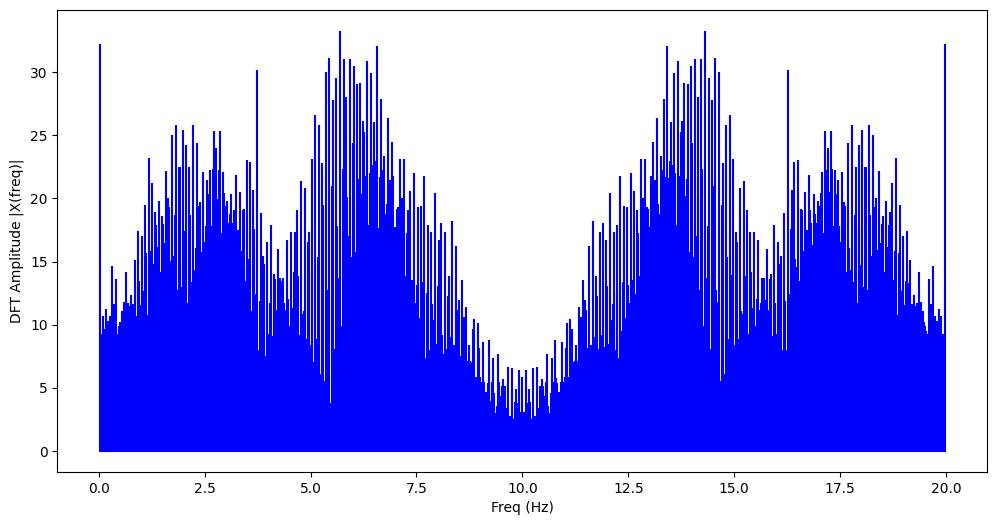

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


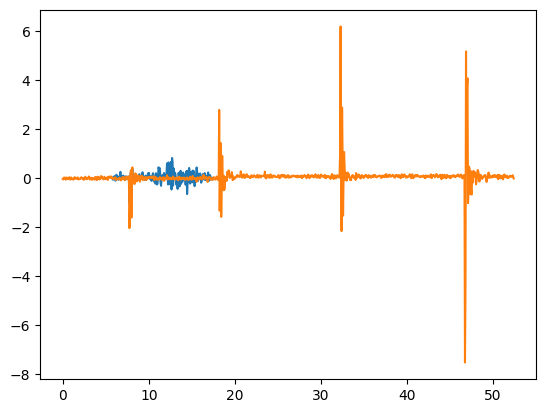

In [4]:

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

X = DFT(S5[3])
#sampling rate
sr = 20
# sample spacing
ts = 1.0 / sr

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.stem(freq[1:], abs(X[1:]), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()
Y1 = np.where(X>.11, X,0)
silly = ifft(Y1)
figgy = plt.figure()
axy = plt.plot(mt_s[100:300],silly[100:300])

axy = plt.plot(mt_s,S5[3])

[13.         13.15384615 13.30769231 13.46153846 13.61538462 13.76923077
 13.92307692 14.07692308 14.23076923 14.38461538 14.53846154 14.69230769
 14.84615385 15.         15.15384615 15.30769231 15.46153846 15.61538462
 15.76923077 15.92307692 16.07692308 16.23076923 16.38461538 16.53846154
 16.69230769 16.84615385 17.         17.15384615 17.30769231 17.46153846
 17.61538462 17.76923077 17.92307692 18.07692308 18.23076923 18.38461538
 18.53846154 18.69230769 18.84615385 19.        ]
[0.1        0.3025641  0.50512821 0.70769231 0.91025641 1.11282051
 1.31538462 1.51794872 1.72051282 1.92307692 2.12564103 2.32820513
 2.53076923 2.73333333 2.93589744 3.13846154 3.34102564 3.54358974
 3.74615385 3.94871795 4.15128205 4.35384615 4.55641026 4.75897436
 4.96153846 5.16410256 5.36666667 5.56923077 5.77179487 5.97435897
 6.17692308 6.37948718 6.58205128 6.78461538 6.98717949 7.18974359
 7.39230769 7.59487179 7.7974359  8.        ]


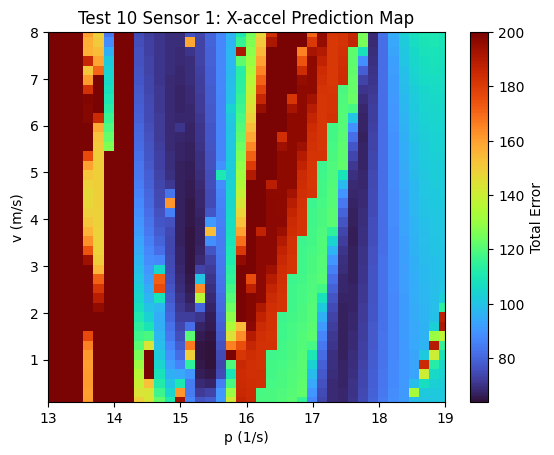

KeyboardInterrupt: ignored

In [13]:
##FINDING A GOOD INTIAL P AND V GUESS##

#Heat mapping the good pairs of P and V


# IF HEAT MAP RETURNS JUST A SOLID COLOR THEN NO P OR V SATISFIED THE EQUATION 
# TRY DIFFERENT BOUNDS FOR P AND V AND INCREASE THE TOLERANCE FOR ERROR

# A GOOD STARTING P INTERVAL IS 1 - 15
# however only do a max range of 10 (2-12 is usually a good start)
# A GOOD STARTING V INTERVAL IS .05 - 3
# I WOULD START THE FIRST INTERVAL WITH A LOWER SPACING SO LIKE l = 30-40
# THIS SHOULD GIVE A ROUGH IDEA OF WHERE THE OPTIMAL P AND V LOCATIONS ARE
# THEN I WOULD 'ZOOM IN' TO THOSE SPOTS BY SHRINKING YOUR P AND V RANGE
# WHEN ZOOMING IN DECREASE THE TOLERANCE FOR ERROR SO YOU CAN SEE BETTER WHICH VALUES
# ARE BETTER AT APPROXIMATING
# THE ERROR TOLERANCE IS THE SECOND TO LAST VARIABLE INPUT FOR HEAT_MAP_X/Y
# THE SPACING VARIABLE IS THE LAST VARIABLE INPUT FOR HEAT_MAP_X/Y
heat_map_x(S1,1, 13, 19, .1, 8, 200,40)
heat_map_x(S4,4, 12, 20, .1, 8, 200,40)
heat_map_x(S5,5, 12, 20, .1, 8, 200,40)
heat_map_x(S7,7, 12, 20, .1, 8, 200,40)
heat_map_x(S6,6, 12, 20, .1, 8, 200,40)
#If you get a list out of index error rerun the first 3 cells in order

In [6]:
##Create CSV file##

#Try to really narrow in on an interval for p and v
# YOU WILL DO THIS VISUALLY BY LOOKING AT THE HEAT MAPS ABOVE
#the maxmimum range should be like 1.5
# get_CSV_y(SENSOR YOU ARE ON , LOW BOUND FOR P, UPPER BOUND FOR P, LOW B. FOR V, UP B. V, SPACING)
S1xp = get_CSV_x(S1,1,9,15,.1,8,60)
S4xp = get_CSV_x(S4,4,9,15,.1,8,60)
S5xp = get_CSV_x(S5,5,9,15,.1,8,60)
S7xp = get_CSV_x(S7,7,9,15,.1,8,60)
def get_min(cry):
  ary = []
  g = np.min(cry[2])
  for i in range(len(cry[2])):
    q = cry[2][i]
    if g == q:
      ary.append(cry[0][i])
      ary.append(cry[1][i])
      ary.append(cry[2][i])
  return ary

## THE ARRAYS THAT PRINT ARE THE VALUES YOU SHOULD JOT DOWN AND THE ORDERING IS [P VALUE, V VALUE, ERROR]
s1mx = get_min(S1xp)
print(s1mx)
s4mx = get_min(S4xp)
print(s4mx)
s5mx = get_min(S5xp)
print(s5mx)
s7mx = get_min(S7xp)
print(s7mx)

#If array is more than 3 numbers then the minimum value is too low for the error
#This happens bc all values return the cutoff value (set at 100)
#So if this happens then the error is bigger than 100 and you should
#try to find a better p and v value range or go into the function get_csv
#and change the cutoff value in the opt_x/y function within the get_csv func
#I put a comment near it to help locate it

KeyboardInterrupt: ignored

In [ ]:
##FINDING A GOOD INTIAL P AND V GUESS##

## THIS IS FOR THE Y SENSOR DATA

#Heat mapping the good pairs of P and V


# IF HEAT MAP RETURNS JUST A SOLID COLOR THEN NO P OR V SATISFIED THE EQUATION 
# TRY DIFFERENT BOUNDS FOR P AND V AND INCREASE THE TOLERANCE FOR ERROR

# A GOOD STARTING P INTERVAL IS 15 - 35
# A GOOD STARTING V INTERVAL IS 1 - 4
# I WOULD START THE FIRST INTERVAL WITH A LOWER SPACING SO LIKE l = 30-40
# THIS SHOULD GIVE A ROUGH IDEA OF WHERE THE OPTIMAL P AND V LOCATIONS ARE
# THEN I WOULD 'ZOOM IN' TO THOSE SPOTS BY SHRINKING YOUR P AND V RANGE
# WHEN ZOOMING IN DECREASE THE TOLERANCE FOR ERROR SO YOU CAN SEE BETTER WHICH VALUES
# ARE BETTER AT APPROXIMATING I USUALLY DECREASE TO WHATEVER THE MIDDLE VALUE ON THE
# TOTAL ERROR COLOR BAR TO THE RIGHT IS
# THE ERROR TOLERANCE IS THE SECOND TO LAST VARIABLE INPUT FOR HEAT_MAP_X/Y
# THE SPACING VARIABLE IS THE LAST VARIABLE INPUT FOR HEAT_MAP_X/Y

# Do this process a few times till you are able to get a range of like 2
# and hopefully able to get error tolerance to 20-30 and still have dark blue

# heat_map_y(SENSOR YOU ARE ON ARRAY, SENSOR NUMBER, LOW BOUND FOR P, UPPER BOUND FOR P, LOW B. FOR V, UP B. V, ERROR TOLERANCE, SPACING)
heat_map_y(S1,1, 1, 15, 1, 10, 100, 40)
heat_map_y(S4,4, 1, 15, 1, 10, 50, 40)
heat_map_y(S5,5, 1, 15, 1, 10, 50, 40)
heat_map_y(S7,7, 1, 15, 1, 10, 100, 40)

In [ ]:
##Create CSV file##

#SAME AS ABOVE JUST THE Y VERSION

#Try to really narrow in on an interval for p and v
#the maxmimum range should be like 1.5
# get_CSV_y(SENSOR YOU ARE ON , LOW BOUND FOR P, UPPER BOUND FOR P, LOW B. FOR V, UP B. V, SPACING)
S1yp = get_CSV_y(S1,1,1,15,2,10,65)
S4yp = get_CSV_y(S4,4,1,15,2,10,65)
S5yp = get_CSV_y(S5,5,1,15,2,10,65)
S7yp = get_CSV_y(S7,7,1,15,2,10,65)
def get_min(cry):
  ary = []
  g = np.min(cry[2])
  for i in range(len(cry[2])):
    q = cry[2][i]
    if g == q:
      ary.append(cry[0][i])
      ary.append(cry[1][i])
      ary.append(cry[2][i])
  return ary

## THE ARRAYS THAT PRINT ARE THE VALUES YOU SHOULD JOT DOWN AND THE ORDERING IT [P VALUE, V VALUE, ERROR]
s1my = get_min(S1yp)
print(s1my)
s4my = get_min(S4yp)
print(s4my)
s5my = get_min(S5yp)
print(s5my)
s7my = get_min(S7yp)
print(s7my)

#If array is more than 3 numbers then the minimum value is too low for the error
#This happens bc all values return the cutoff value (set at 100)
#So if this happens then the error is bigger than 100 and you should
#try to find a better p and v value range or go into the function get_csv
#and change the cutoff value in the opt_x/y function within the get_csv func
#I put a comment near it to help locate it

In [ ]:
##Get weighted Average P and V

#weight the average by the inverse of the error so that predictions that give
#the more accurate reading for their sensor is weighter more than ones that yield bigger error
Sclx = 1/s5mx[2] + 1/s4mx[2] + 1/s1mx[2] + 1/s7mx[2]
wtd_Px = (s5mx[0]/s5mx[2] + s4mx[0]/s4mx[2] + s1mx[0]/s1mx[2] + s7mx[0]/s7mx[2])/Sclx
wtd_Vx = (s5mx[1]/s5mx[2] + s4mx[1]/s4mx[2] + s1mx[1]/s1mx[2] + s7mx[1]/s7mx[2])/Sclx

#Scly = 1/s5my[2] + 1/s4my[2] + 1/s1my[2] + 1/s7my[2]
#wtd_Py = (s5my[0]/s5my[2] + s4my[0]/s4my[2] + s1my[0]/s1my[2] + s7my[0]/s7my[2])/Scly
#wtd_Vy = (s5my[1]/s5my[2] + s4my[1]/s4my[2] + s1my[1]/s1my[2] + s7my[1]/s7my[2])/Scly

#write thes values down
print(wtd_Px)
print(wtd_Vx)


In [ ]:
## RUN IF YOU WANT TO CHECK THE CSV FILE OF DATA ##
#CSV files can take a little bit to appear#
# you'll need to edit this code if you want to do the files
# just change the S5xp to whatever sensor file you want to look at
dx = {'P_col': S5xp[0], 'V_col': S5xp[1], 'error': S5xp[2]}
df = pd.DataFrame(dx)
df.to_csv('X.csv', index=False)
dy = {'P_col': S1xp[0], 'V_col': S1xp[1], 'error': S1xp[2]}
df = pd.DataFrame(dy)
df.to_csv('Y.csv', index=False)

In [ ]:
##TESTING THE PREDICTIONS##
#Should be able to just run these cells without changing anything
def get_prd_x(S,p,v,N):
  r = []
  for i in range(S[8][0],S[8][1]):
    r.append(S_X_Prd(S6, p , v , check[i], N, i ))
  return r
def get_prd_y(S,p,v,N):
  r = []
  for i in range(S[9][0],S[9][1]):
    r.append(S_Y_Prd(S6, p , v , check[i], N, i ))
  return r

pxfig = plt.figure()
S6px_1 = get_prd_x(S6,s1mx[0], s1mx[1] ,12)
S6px_4 = get_prd_x(S6,s4mx[0], s4mx[1] ,12)
S6px_5 = get_prd_x(S6,s5mx[0], s5mx[1] ,12)
S6px_7 = get_prd_x(S6,s7mx[0], s7mx[1] ,12)
S6px_WA = get_prd_x(S6,15, 6.5, 12)
RData, = plt.plot(mt_s[S6[8][0]:S6[8][1]],S6[3][S6[8][0]:S6[8][1]], c = 'k')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_1,S6px_5, color = 'pink')
plt.plot(mt_s[S6[8][0]:S6[8][1]],S6px_WA)
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_1,S6px_4, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_4,S6px_5, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_7,S6px_5, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_7,S6px_4, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_7,S6px_1, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_WA,S6px_1, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_WA,S6px_4, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_WA,S6px_5, color = 'pink')
plt.fill_between(mt_s[S6[8][0]:S6[8][1]],S6px_WA,S6px_7, color = 'pink')
plt.xlabel("Time (seconds)")
plt.title("Test " + Test_num + ": Prediction versus Data for Sensor 6 X-acceleration")
plt.ylabel("Sensor Readings (m/s^2)")
plt.legend(['Sensor 6 Data', 'Predicitve zone', "Weighted Avg. Prediction"])
svp = "Prediction_graph_x_Test_" + Test_num + ".jpg"
pxfig.savefig(svp)
plt.show()

#Record the r-squared value please
print(r2_score(S6[3][S6[8][0]:S6[8][1]],S6px_WA))

In [ ]:
##TESTING THE PREDICTIONS##

#Y version
pyfig = plt.figure()
S6py_1 = get_prd_y(S6,s1my[0] , s1my[1] ,12)
S6py_4 = get_prd_y(S6,s4my[0] , s4my[1] ,12)
S6py_5 = get_prd_y(S6,s5my[0] , s5my[1] ,12)
S6py_7 = get_prd_y(S6,s7my[0] , s7my[1] ,12)
plt.plot(mt_s[S6[9][0]:S6[9][1]],S6[4][S6[9][0]:S6[9][1]], c = 'k')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_1,S6py_5, color = 'pink')
S6py_WA = get_prd_y(S6,wtd_Py, wtd_Vy, 12)
plt.plot(mt_s[S6[9][0]:S6[9][1]],S6py_WA)
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_1,S6py_4, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_4,S6py_5, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_7,S6py_5, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_7,S6py_4, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_4,S6py_7, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_WA,S6py_1, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_WA,S6py_4, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_WA,S6py_5, color = 'pink')
plt.fill_between(mt_s[S6[9][0]:S6[9][1]],S6py_WA,S6py_7, color = 'pink')
plt.xlabel("Time (seconds)")
plt.title("Test " + Test_num + ": Prediction versus Data for Sensor 6 Y-acceleration")
plt.ylabel("Sensor Readings (m/s^2)")
plt.legend(['Sensor 6 Data', 'Predicitve zone'])
svpy = "Prediction_graph_x_Test_" + Test_num + ".jpg"
pyfig.savefig(svpy)
plt.show()
print(r2_score(S6[4][S6[9][0]:S6[9][1]],S6py_WA))

In [ ]:
#Positional wave equation (Graphing surface of water/plastic)
def wave_eq(v,p,x,y,t,N,i):
  result = 0
  n = 1
  m = 1
  while(n<N+1):
    while(m<N+1):
      term1 = np.sin((n*np.pi*x) / lx)
      term2 = np.sin((m*np.pi*y) / ly)
      term3 = np.exp((-p*t) / 2)
      term5 = np.sin((m*np.pi*(S5[1]))/ly) * np.sin((n*np.pi*(S5[0])) / lx) #Sensor 5
      term11 = np.sin((m*np.pi*(S1[1]))/ly) * np.sin((n*np.pi*(S1[0])) / lx) #Sensor 1
      term7 = np.sin((m*np.pi*(S7[1]))/ly) * np.sin((n*np.pi*(S7[0])) / lx) #Sensor 7
      term4 = np.sin((m*np.pi*(S4[1]))/ly) * np.sin((n*np.pi*(S4[0])) / lx) #Sensor 4
      l = (v**2)*(np.pi**2)*((n**2)/(lx**2)+(m**2)/(ly**2))
      if (4*l > (p**2)):
        w = (np.sqrt((4*l - (p**2))))/2
        if w != 0:
          C = -((-4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
          E = np.exp((p*np.pi)/(w))
          D = (((S7[4][i + int(np.pi/w)])*(term7) + (S4[4][i+ int(np.pi/w)])*(term4) + (S5[4][i+int(np.pi/w)])*(term5) + (S1[4][i+int(np.pi/w)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
          A = (1/(((((p**2)/4)-w**2)*C-D*p*w)*4*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
          result += A*(term1 * term2 * term3 * (C * np.cos( w * t) + D * np.sin (w * t)))
          m += 1
      else:
        w = (np.sqrt(((p**2)- 4*l)))/2
        if w != 0:
          C = ((4*lx)/((n**2)*(np.pi**2)*ly))*((S5[3][i])*(term5) - (S4[4][i])*(term4) + (S7[4][i])*(term7) - (S1[3][i])*(term11))
          E = np.exp((p*np.pi)/(w))
          D = (((S7[4][i + int(np.pi/w)])*(term7) + (S4[4][i +int(np.pi/w)])*(term4) + (S5[4][i +int(np.pi/w)])*(term5) + (S1[4][i+int(np.pi/w)])*(term11)))*((E*4*ly)/(lx*(np.pi**2)*(m**2)))
          A = (1/(((((p**2)/4)+w**2)*C-D*p*w)*4*lx*ly))*(-(S7[5][i])*(term7)-(S4[5][i])*(term4)-(S5[5][i])*(term5)-(S1[5][i]*(term11)))
          result += A*(term1 * term2 * term3 * (C * np.cosh( w * t) - D * np.sinh(w * t)))
          m += 1
    n += 1
  return result


#Get numbers and such
x = np.linspace(0, lx, 1000)
y = np.linspace(0, ly, 1000)
z = np.linspace(-.1,.1,10)
t = 0
X, Y = np.meshgrid(x, y)
Z = wave_eq(.25,3.6,X,Y,0,25,0)

# Create the figure and 3D axis
fig = plt.figure(figsize = (8,5))
ax = plt.axes(projection='3d')
ax.axes.set_zlim3d( bottom= -1.5e-1, top=1.5e-1)
ax.set_box_aspect((np.ptp(x),np.ptp(y),np.ptp(z)))
import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(z1)

normi = plt.Normalize(vmin = -.17 , vmax = .1)



def update(i):
  ax.clear()
  t = str(round(mt_s[i + 435],3))
  titl = "Surface of Water at Time = " + t + " seconds"
  ax.set_title(titl)
  ax.axes.set_zlim3d( bottom= -1.5e-1, top=1.5e-1)
  ax.set_xlabel('y-axis (meters)', labelpad=20)
  ax.set_ylabel('x-axis (meters)', labelpad=20)
  ax.set_zlabel('z-axis (meters)', labelpad=20)
  x = np.linspace(0, lx, 1000)
  y = np.linspace(0, ly, 1000)
  X, Y = np.meshgrid(x, y)
  Z = wave_eq(.25,3.6,X,Y,check[i + 435],12, (i +435))
  wave = ax.plot_surface(X,Y,Z, rstride = 10, cstride = 10,
                cmap='ocean', norm = normi, edgecolor='none')
  return wave



ani = FuncAnimation(fig, update, frames = 40 , interval = 100)
plt.show()
ani.save('WAVE_ANI.gif')

[792, 832]
[794, 834]
[793, 833]
[794, 834]
